# Data Preprocessing

scanpy tutorial: https://scanpy.readthedocs.io/en/stable/tutorials/basics/clustering.html

In [ ]:
!pip install scanpy
!pip install anndata
!pip install leidenalg
!pip install louvain
!pip install matplotlib
!pip install numpy
!pip install pandas
!pip install scikit-learn
!pip install scipy
!pip install seaborn
!pip install shap pdpbox
!pip install tf-keras-vis

In [ ]:
import scanpy as sc
import anndata as ad
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load Data and Random Forest Results


In [ ]:
#!pip install --quiet gdown

import gdown
file_id = "18fLXlcGCAxy_aRrriCwLBTmVlOgu3GDM"
url     = f"https://drive.google.com/uc?id={file_id}"
output = "adata_alzheimers_80k.h5ad"
gdown.download(url, output, quiet=False)

adata = ad.read_h5ad(output)
adata


Downloading...
From (original): https://drive.google.com/uc?id=18fLXlcGCAxy_aRrriCwLBTmVlOgu3GDM
From (redirected): https://drive.google.com/uc?id=18fLXlcGCAxy_aRrriCwLBTmVlOgu3GDM&confirm=t&uuid=916ba795-3bad-48be-afc3-f5726cb76b0e
To: /content/adata_alzheimers_80k.h5ad
100%|██████████| 2.71G/2.71G [00:45<00:00, 59.7MB/s]


AnnData object with n_obs × n_vars = 79647 × 36092
    obs: 'assay', 'cell_type', 'tissue', 'tissue_general', 'suspension_type', 'disease', 'sex', 'dataset_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'n_counts'
    var: 'feature_id', 'feature_type', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'cell_type_colors', 'dataset_id_colors', 'disease_colors', 'hvg', 'log1p', 'neighbors', 'pca', 'sex_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs

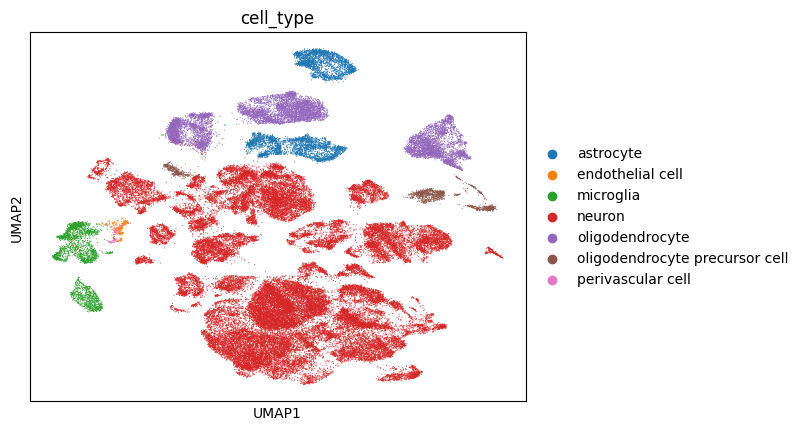

In [ ]:
sc.pl.umap(
    adata,
    color="cell_type",
    size=2,
)

# Load In Random Forest Results

In [ ]:
import gdown
import pickle

#    https://drive.google.com/file/d/1-4IlB7kf8JxacckS7FoL190G9q-UpLM0/view?usp=drive_link
file_id = "1-4IlB7kf8JxacckS7FoL190G9q-UpLM0"

url = f"https://drive.google.com/uc?id={file_id}"

output = "rf_results.pkl"
gdown.download(url, output, quiet=False)

with open(output, "rb") as f:
    results = pickle.load(f)



Downloading...
From: https://drive.google.com/uc?id=1-4IlB7kf8JxacckS7FoL190G9q-UpLM0
To: /content/rf_results.pkl
100%|██████████| 14.8k/14.8k [00:00<00:00, 13.2MB/s]

Loaded object type: <class 'dict'>
Top-level keys or attributes: ['__class__', '__class_getitem__', '__contains__', '__delattr__', '__delitem__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__']


In [ ]:
! pip install adjustText

# Random Forest Scatter Plots
### Female Count out of 100 iterations on X axis, Male count out of 100 iterations on Y Axis

94 [-0.64039588 -0.70248676]
95 [ 0.68972314 -0.51534668]
106 [-0.27810358 -0.00449267]
107 [ 0.22734484 -0.93556632]
110 [0.84624468 0.09895478]
44 [0.84103737 0.700178  ]
129 [-0.48122329 -0.16712263]
79 [-0.19701982  0.94123269]
91 [0.60412791 0.68017446]
92 [ 0.06932017 -0.03594411]
93 [-0.63309258 -0.31361431]


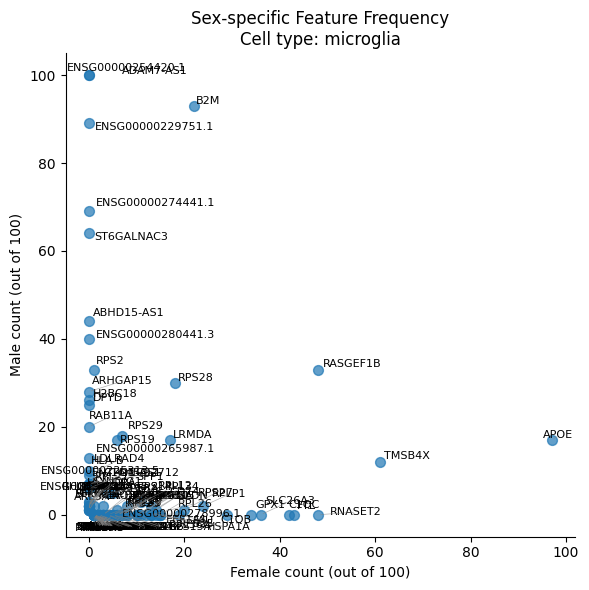

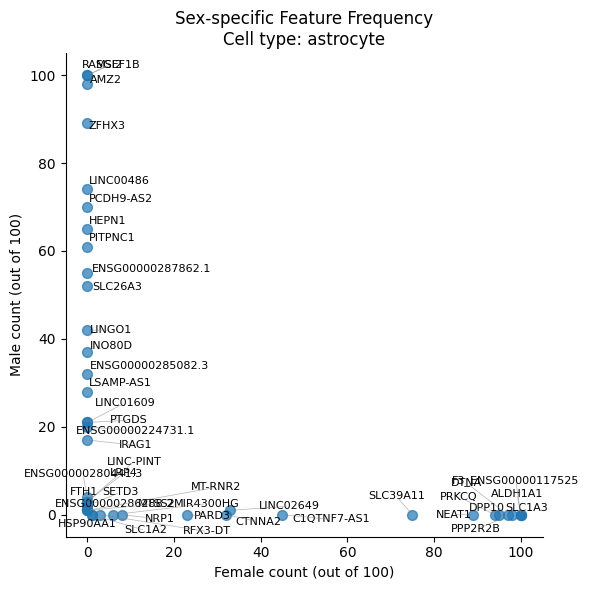

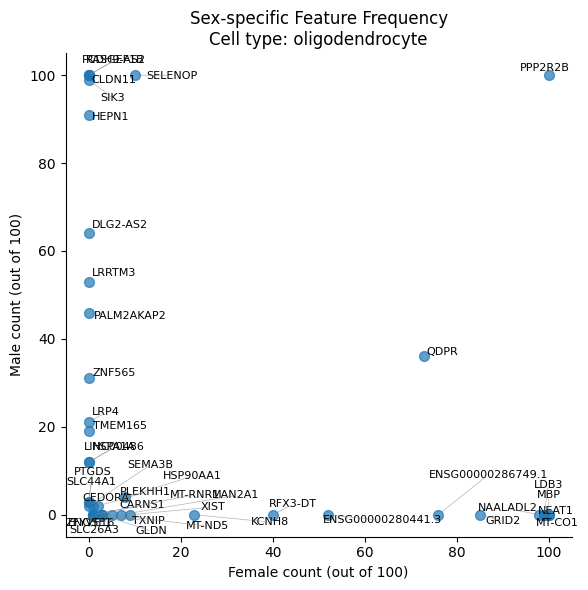

16 [ 0.41655842 -0.54647967]
24 [-0.56535021  0.51185438]
12 [-0.81151111 -0.96055011]
16 [-0.64183556  0.18338846]


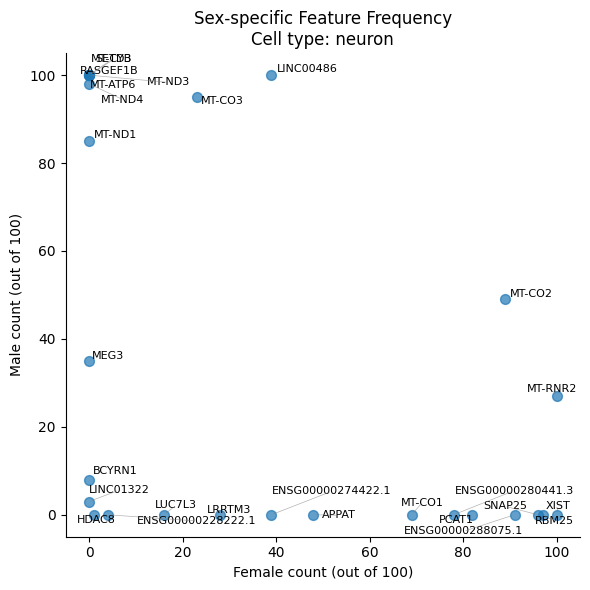

20 [0.47540894 0.16639222]
37 [-0.6541472   0.59564986]


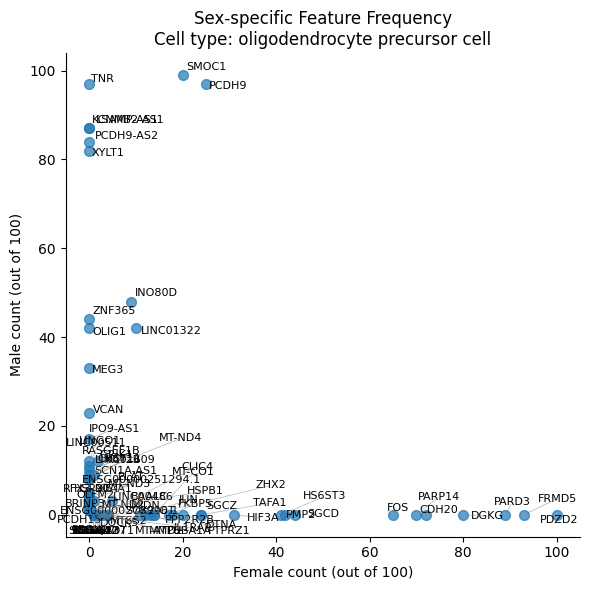

29 [0.57964952 0.91896302]
125 [0.22878183 0.95977841]


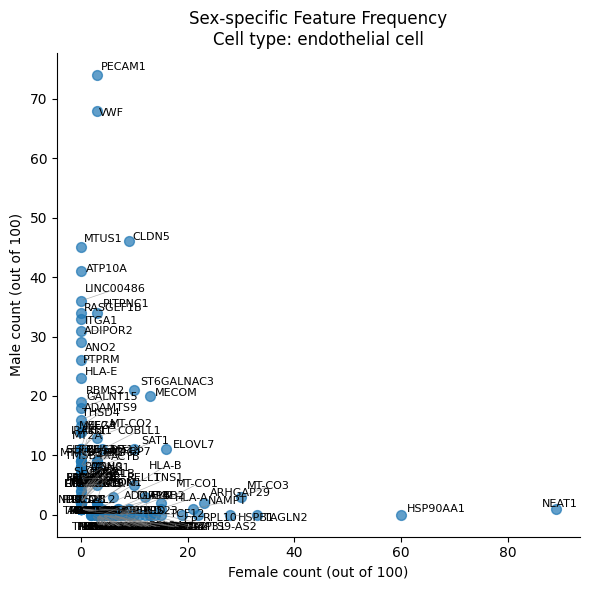

21 [ 0.85491257 -0.37439012]
31 [-0.87820742 -0.34134339]
29 [-0.80570625 -0.75126434]
93 [0.19919213 0.07573436]
44 [-0.15372307  0.91175858]
60 [ 0.17842689 -0.88500604]


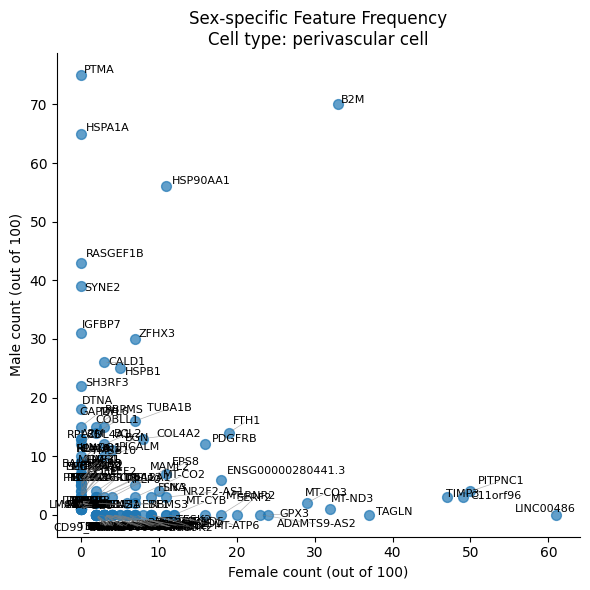

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
from adjustText import adjust_text

for ct, sex_dict in results.items():
    # Merge female/male counts
    df_f = sex_dict['female'].rename(columns={'count':'female_count'})
    df_m = sex_dict['male'].rename(columns={'count':'male_count'})
    combined = pd.merge(df_f, df_m,
                        left_index=True, right_index=True,
                        how='outer').fillna(0)

    fig, ax = plt.subplots(figsize=(6,6))
    ax.scatter(combined['female_count'], combined['male_count'], s=50, alpha=0.7)
    ax.set_title(f"Sex-specific Feature Frequency\nCell type: {ct}")
    ax.set_xlabel('Female count (out of 100)')
    ax.set_ylabel('Male count (out of 100)')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # create text objects
    texts = []
    for feat, x, y in zip(combined.index, combined['female_count'], combined['male_count']):
        texts.append(ax.text(x, y, feat, fontsize=8))

    adjust_text(
        texts,
        autoalign='xy',
        only_move={'points':'xy', 'text':'xy'},
        expand_text=(1.1, 1.1),
        expand_points=(1.1, 1.1),
        arrowprops=dict(arrowstyle='-', color='gray', linewidth=0.5, alpha=0.6),
        ax=ax
    )

    plt.tight_layout()
    plt.show()


In [ ]:
# just print out top 20 of each sex from RFresults
for ct, sex_dict in results.items():
    print(f"\nCell type: {ct}")
    for sex in ['female', 'male']:
        df = sex_dict.get(sex)
        if df is None or df.empty:
            print(f"  {sex.capitalize()}: (no data)")
            continue
        top20 = df.index[:20].tolist()
        print(f"  {sex.capitalize()} Top 20: {', '.join(top20)}")



Cell type: microglia
  Female Top 20: APOE, TMSB4X, RASGEF1B, RNASET2, FTL, C1QC, SLC26A3, GPX1, C1QB, RPLP1, B2M, RPS27, FAU, RPS28, LRMDA, HSPA1A, GLDN, RPL36A, RPS25, EEF1A1
  Male Top 20: ADAM7-AS1, ENSG00000254420.1, B2M, ENSG00000229751.1, ENSG00000274441.1, ST6GALNAC3, ABHD15-AS1, ENSG00000280441.3, RASGEF1B, RPS2, RPS28, ARHGAP15, H2BC18, DPYD, RAB11A, RPS29, LRMDA, RPS19, APOE, ENSG00000265987.1

Cell type: astrocyte
  Female Top 20: SLC1A3, F3_ENSG00000117525, ALDH1A1, PPP2R2B, DTNA, DPP10, PRKCQ, NEAT1, SLC39A11, C1QTNF7-AS1, LINC02649, CTNNA2, PARD3, NRP1, MIR4300HG, RFX3-DT, HSP90AA1, SLC1A2
  Male Top 20: MSI2, RASGEF1B, AMZ2, ZFHX3, LINC00486, PCDH9-AS2, HEPN1, PITPNC1, ENSG00000287862.1, SLC26A3, LINGO1, INO80D, ENSG00000285082.3, LSAMP-AS1, PTGDS, LINC01609, ENSG00000224731.1, IRAG1, ENSG00000280441.3, LINC-PINT

Cell type: oligodendrocyte
  Female Top 20: NEAT1, MBP, PPP2R2B, MT-CO1, LDB3, NAALADL2, GRID2, ENSG00000286749.1, QDPR, ENSG00000280441.3, RFX3-DT, KCNH8, S

# Bar Plots
## For each cell type, a plot with the top female genes, plot with the top male genes, and plot with the highest average between both

<Figure size 600x500 with 0 Axes>

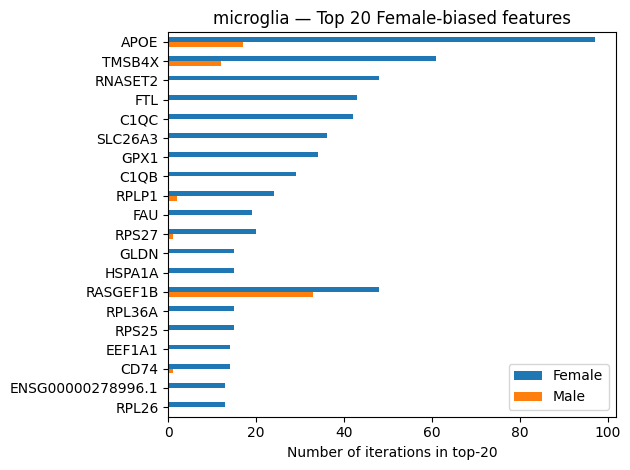

<Figure size 600x500 with 0 Axes>

<Figure size 600x500 with 0 Axes>

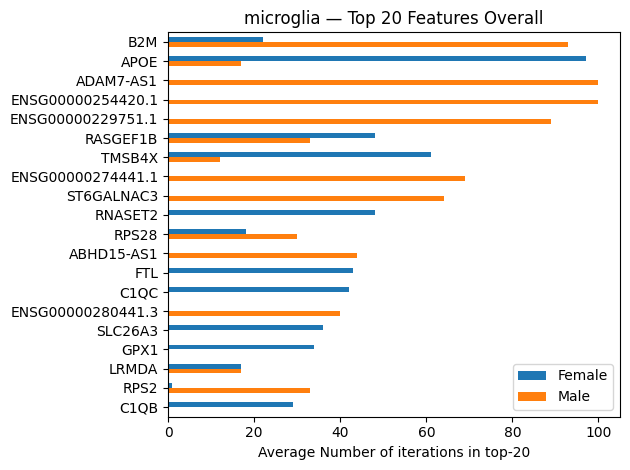

<Figure size 600x500 with 0 Axes>

<Figure size 600x500 with 0 Axes>

<Figure size 600x500 with 0 Axes>

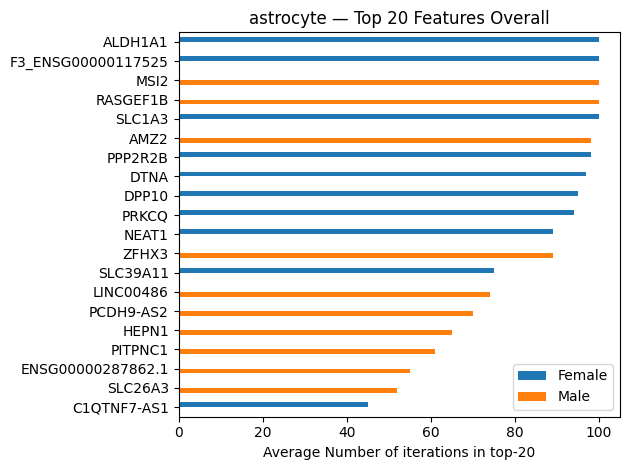

<Figure size 600x500 with 0 Axes>

<Figure size 600x500 with 0 Axes>

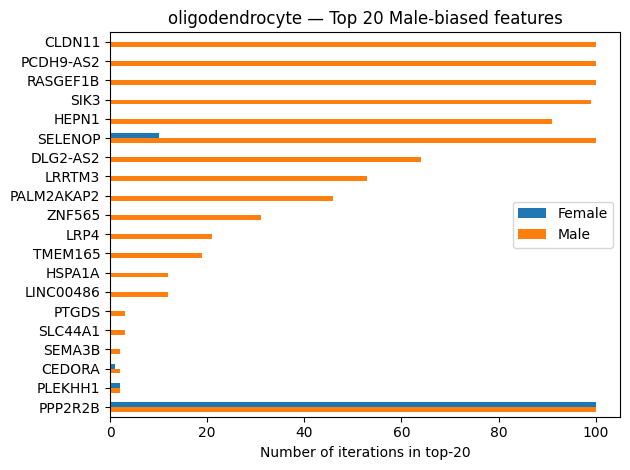

<Figure size 600x500 with 0 Axes>

<Figure size 600x500 with 0 Axes>

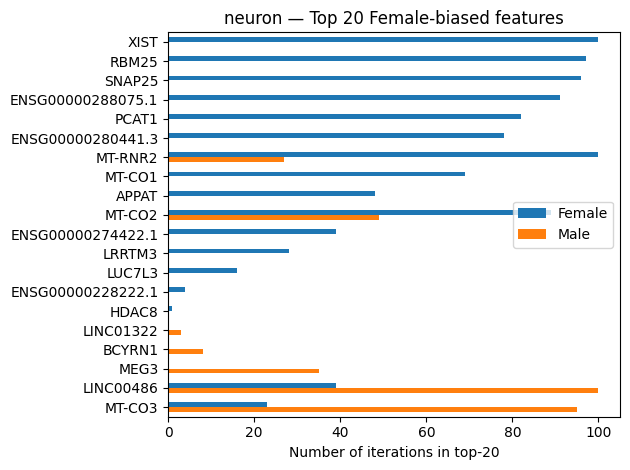

<Figure size 600x500 with 0 Axes>

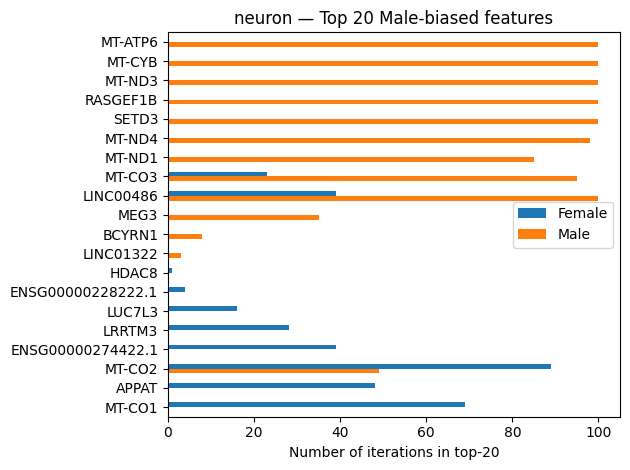

<Figure size 600x500 with 0 Axes>

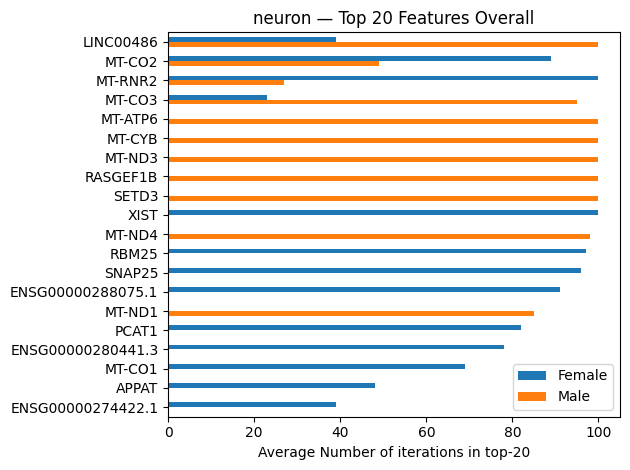

<Figure size 600x500 with 0 Axes>

<Figure size 600x500 with 0 Axes>

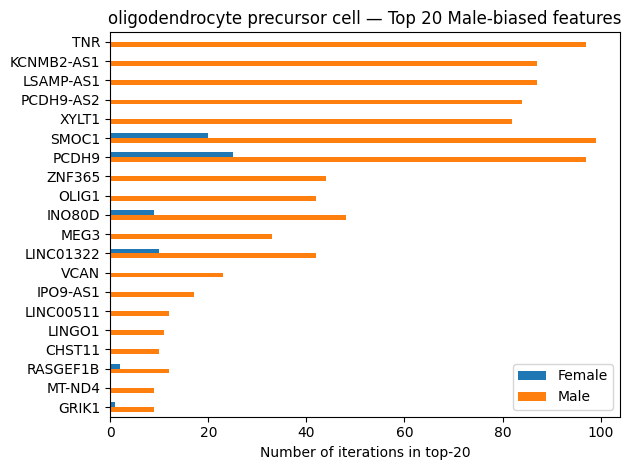

<Figure size 600x500 with 0 Axes>

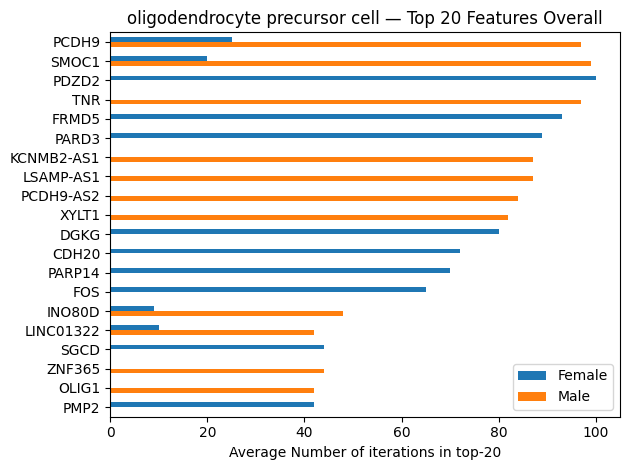

<Figure size 600x500 with 0 Axes>

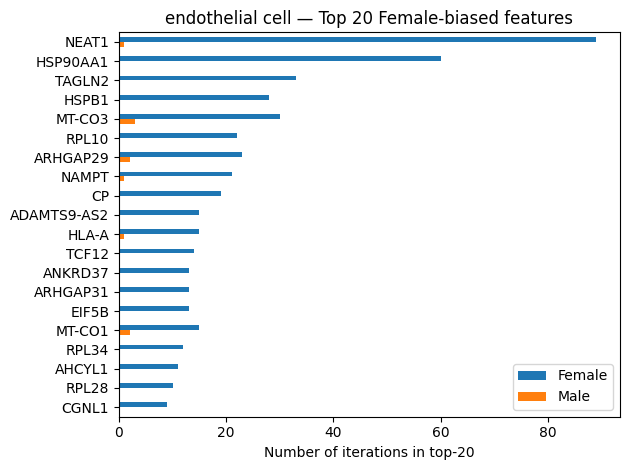

<Figure size 600x500 with 0 Axes>

<Figure size 600x500 with 0 Axes>

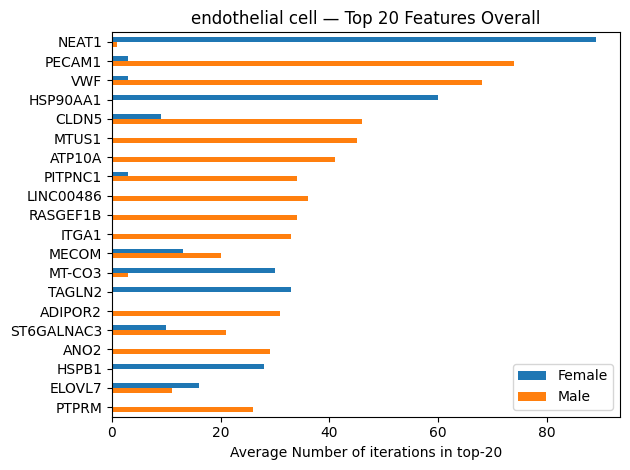

<Figure size 600x500 with 0 Axes>

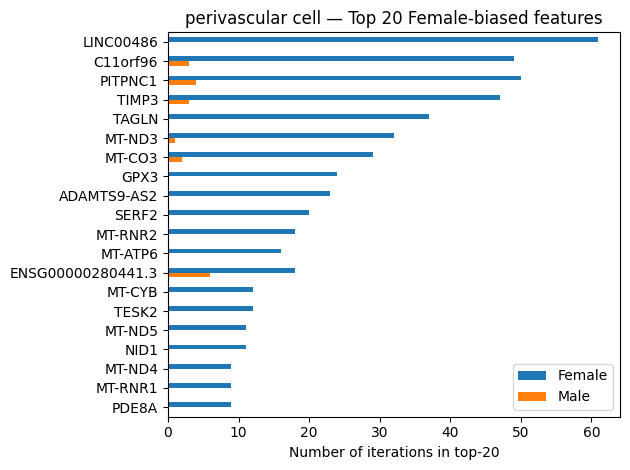

<Figure size 600x500 with 0 Axes>

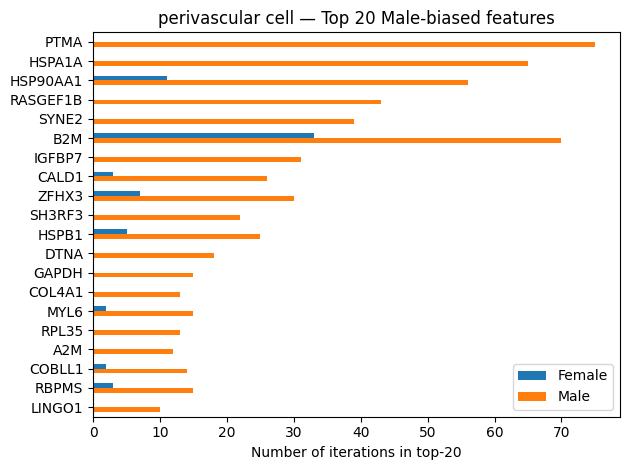

<Figure size 600x500 with 0 Axes>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

for ct, sex_dict in results.items():
    # 1) merge female & male counts
    df_f = sex_dict['female'].rename(columns={'count':'female_count'})
    df_m = sex_dict['male'].rename(columns={'count':'male_count'})
    combined = (
        pd.merge(df_f, df_m,
                 left_index=True, right_index=True,
                 how='outer')
        .fillna(0)
        .astype(int)
    )
    # compute difference
    combined['count_diff'] = combined['female_count'] - combined['male_count']

    # Top 20 female‐biased
    top_f = combined.nlargest(20, 'count_diff')[['female_count','male_count']]
    plt.figure(figsize=(6,5))
    ax = top_f.plot.barh()
    ax.invert_yaxis()
    ax.set_xlabel('Number of iterations in top-20')
    ax.set_title(f"{ct} — Top 20 Female-biased features")
    ax.legend(['Female','Male'])
    plt.tight_layout()
    plt.show()

    # Top 20 male‐biased
    bot_m = combined.nsmallest(20, 'count_diff')[['female_count','male_count']]
    plt.figure(figsize=(6,5))
    ax = bot_m.plot.barh()
    ax.invert_yaxis()
    ax.set_xlabel('Number of iterations in top-20')
    ax.set_title(f"{ct} — Top 20 Male-biased features")
    ax.legend(['Female','Male'])
    plt.tight_layout()
    plt.show()


    # Top 20 Overall (with bars for female and male counts)
    combined['avg_count'] = (combined['female_count'] + combined['male_count']) / 2
    top_overall = combined.nlargest(20, 'avg_count')[['female_count','male_count']]

    plt.figure(figsize=(6,5))
    ax = top_overall.plot.barh()
    ax.invert_yaxis()
    ax.set_xlabel("Average Number of iterations in top-20")
    ax.set_title(f"{ct} — Top 20 Features Overall")
    ax.legend(['Female','Male'])
    plt.tight_layout()
    plt.show()



# Heatmap with all data
## With top 5 female and male biased genes

<ipython-input-19-8ddac7fa2f01>:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = expr_df.groupby(['cell_type','disease','sex']).mean()


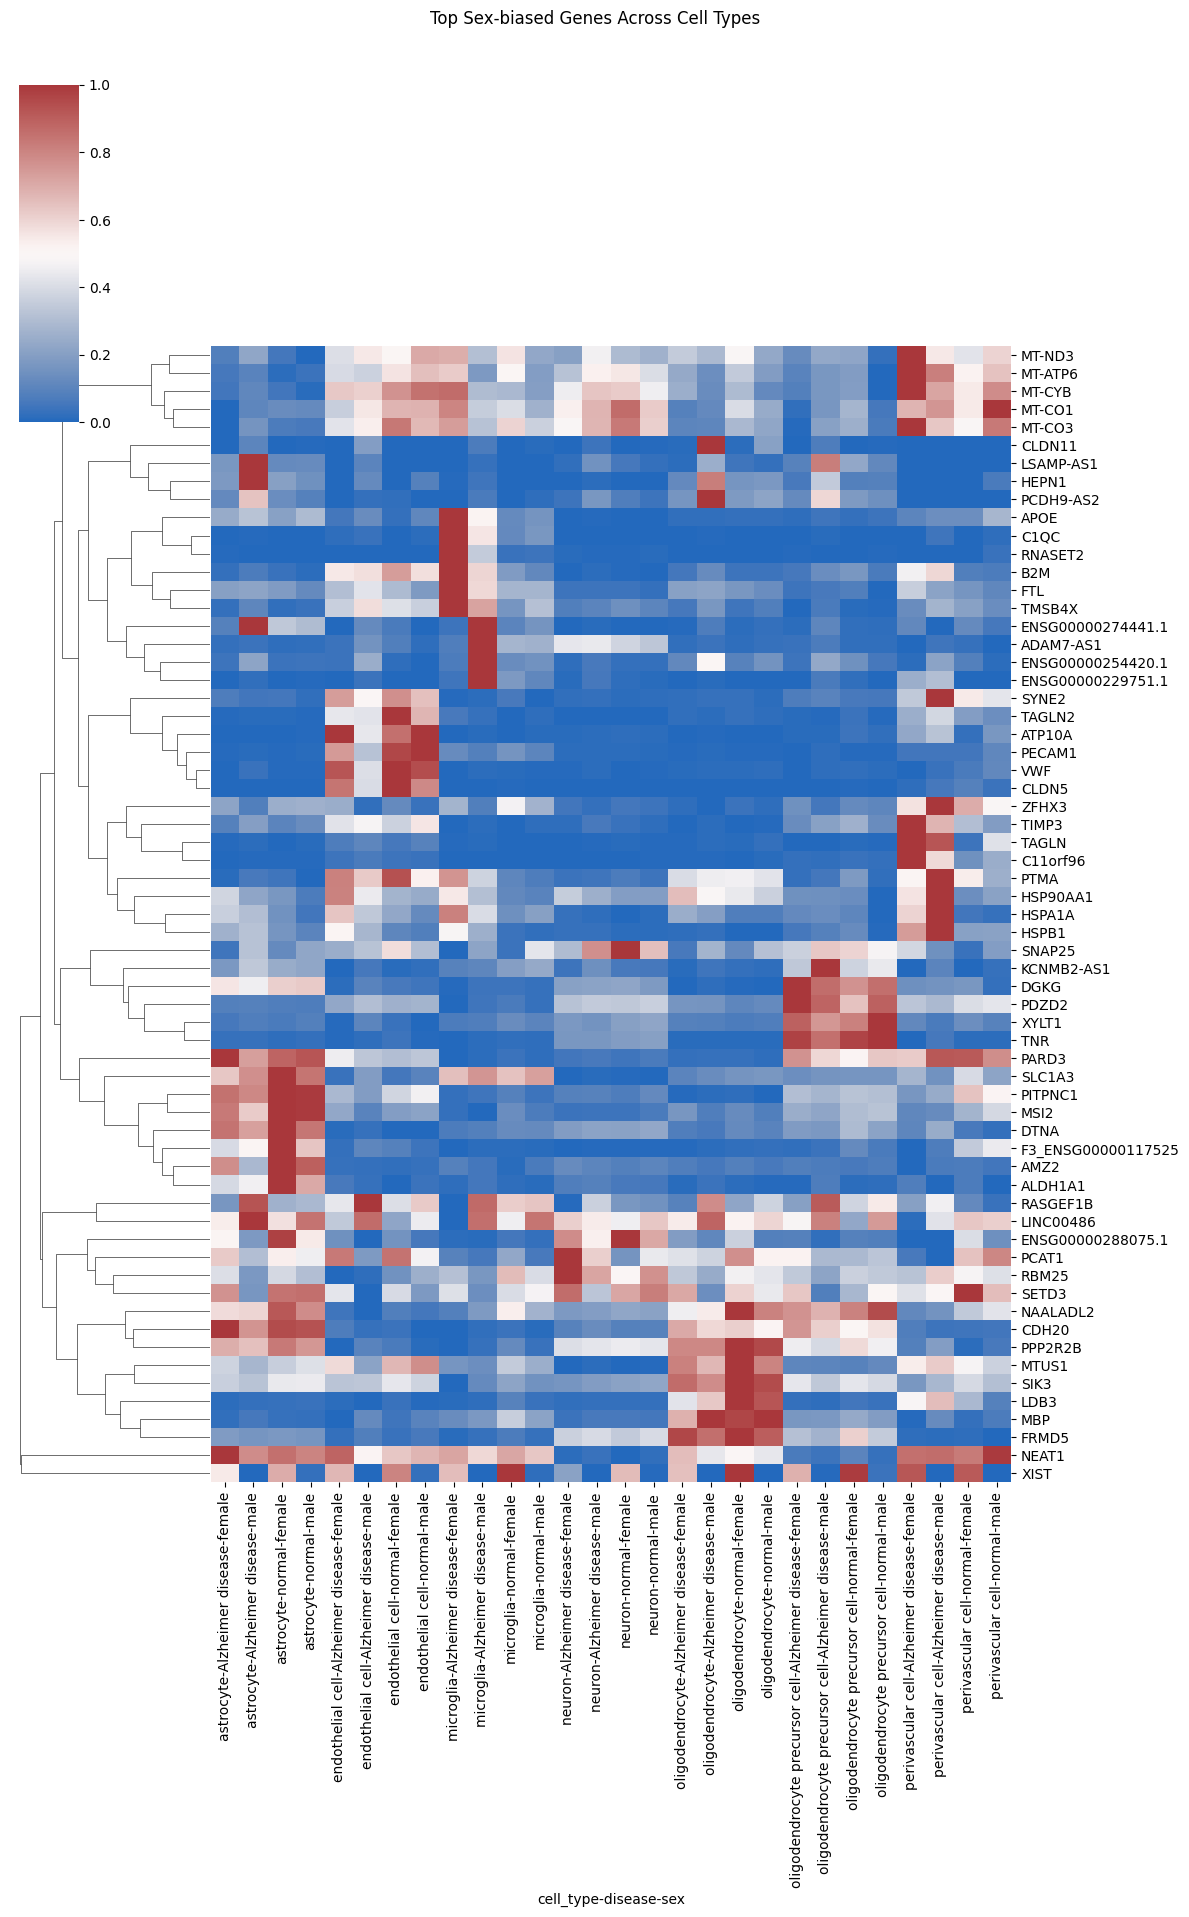

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import sparse

# Top 10 female, male genes from each cell type
genes_union = set()
for ct, sex_dict in results.items():
    # merge counts
    df_f = sex_dict['female'].rename(columns={'count':'female_count'})
    df_m = sex_dict['male'].rename(columns={'count':'male_count'})
    combined = (
        pd.merge(df_f, df_m,
                 left_index=True, right_index=True,
                 how='outer')
        .fillna(0)
        .astype(int)
    )
    combined['count_diff'] = combined['female_count'] - combined['male_count']
    combined['avg_count']  = (combined['female_count'] + combined['male_count'])/2

    # pick top-10 female‐biased, male‐biased
    top_f = combined.nlargest(5, 'count_diff').index
    bot_m = combined.nsmallest(5, 'count_diff').index

    genes_union.update(top_f)
    genes_union.update(bot_m)

genes_union = list(genes_union)

# Get expression for these genes
mat = adata[:, genes_union].X
if sparse.issparse(mat):
    mat = mat.toarray()
expr_df = pd.DataFrame(mat,
                       index=adata.obs_names,
                       columns=genes_union)

# Get metadata and average per (cell_type, disease, sex)
meta = adata.obs[['cell_type','disease','sex']]
expr_df = expr_df.join(meta)
grouped = expr_df.groupby(['cell_type','disease','sex']).mean()

# Plot
heat_df = grouped[genes_union].T
heat_df.columns = pd.MultiIndex.from_tuples(
    heat_df.columns,
    names=['cell_type','disease','sex']
)

sns.clustermap(
    heat_df,
    row_cluster=True,
    col_cluster=False,
    cmap='vlag',
    standard_scale=0,   # z-score each gene
    figsize=(12, len(genes_union)*0.25 + 3),
    xticklabels=True,
    yticklabels=True
)
plt.suptitle("Top Sex‐biased Genes Across Cell Types", y=1.02)
plt.show()


# Heatmap per cell type
### With top 10 female, male, and overall genes

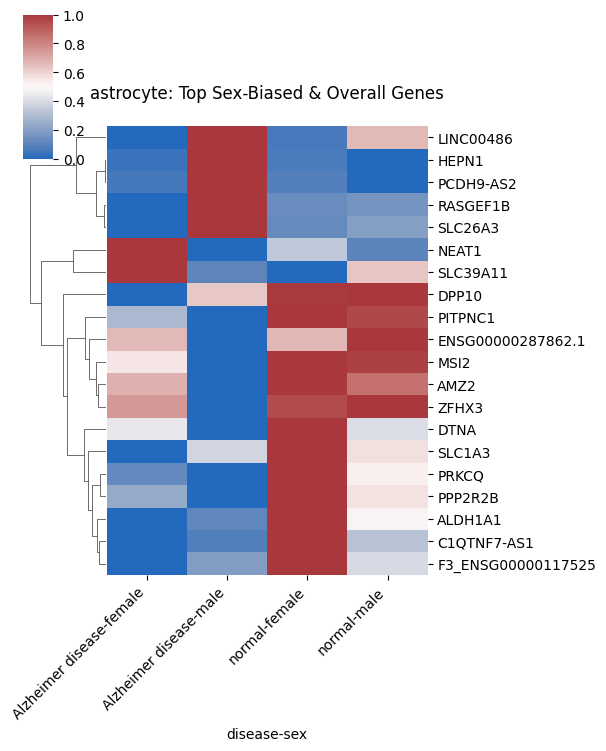

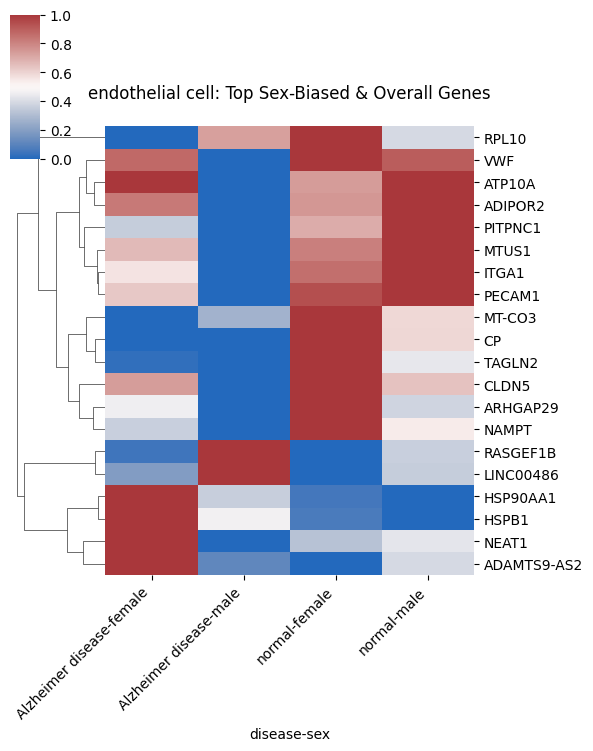

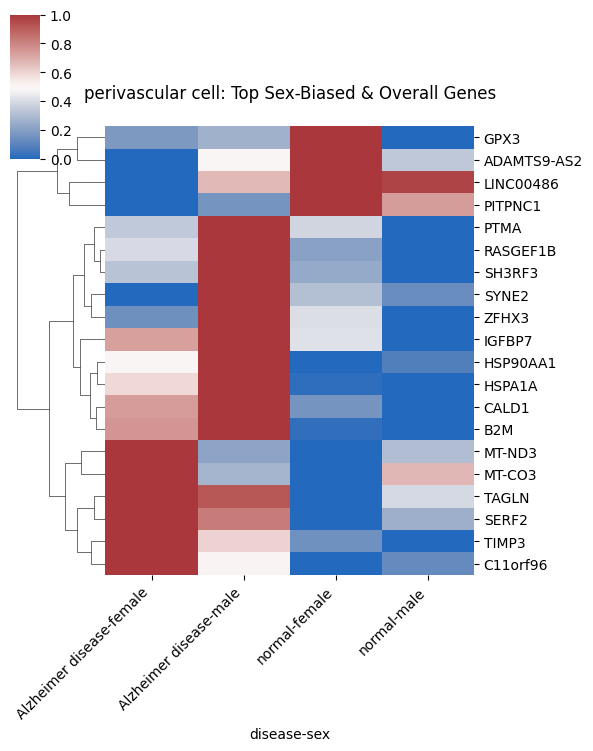

In [ ]:
import matplotlib.patches as mpatches
from scipy import sparse


for ct, sex_dict in results.items():
    # pick the union of top-10 F, top-10 M, top-10 overall genes
    df_f = sex_dict['female'].rename(columns={'count':'female_count'})
    df_m = sex_dict['male'].  rename(columns={'count':'male_count'})
    comb = (
        pd.merge(df_f, df_m,
                 left_index=True, right_index=True,
                 how='outer')
        .fillna(0).astype(int)
    )
    comb['diff'] = comb['female_count'] - comb['male_count']
    comb['avg']  = (comb['female_count'] + comb['male_count'])/2

    top_f = comb.nlargest(10, 'diff').index
    bot_m = comb.nsmallest(10, 'diff').index
    top_o = comb.nlargest(10, 'avg').index
    genes_ct = list({*top_f, *bot_m, *top_o})

    # average per (disease,sex)
    mask = adata.obs['cell_type'] == ct
    mat = adata[mask, genes_ct].X
    if sparse.issparse(mat): mat = mat.toarray()
    df_mat = pd.DataFrame(mat, index=adata.obs_names[mask], columns=genes_ct)
    df_mat = df_mat.join(adata.obs.loc[mask, ['disease','sex']])

    grouped = df_mat.groupby(['disease','sex'], observed=True).mean()
    heat_df = grouped[genes_ct].T

    # plot
    cg = sns.clustermap(
        heat_df,
        row_cluster=True,
        col_cluster=False,
        cmap='vlag',
        standard_scale=0,
        figsize=(6, len(genes_ct)*0.25 + 3),
        xticklabels=True,
        yticklabels=True
    )
    cg.ax_heatmap.set_title(f"{ct}: Top Sex‐Biased & Overall Genes", pad=20)

    cg.ax_heatmap.set_xticklabels(
        cg.ax_heatmap.get_xticklabels(),
        rotation=45,
        ha='right'
    )

    plt.show()

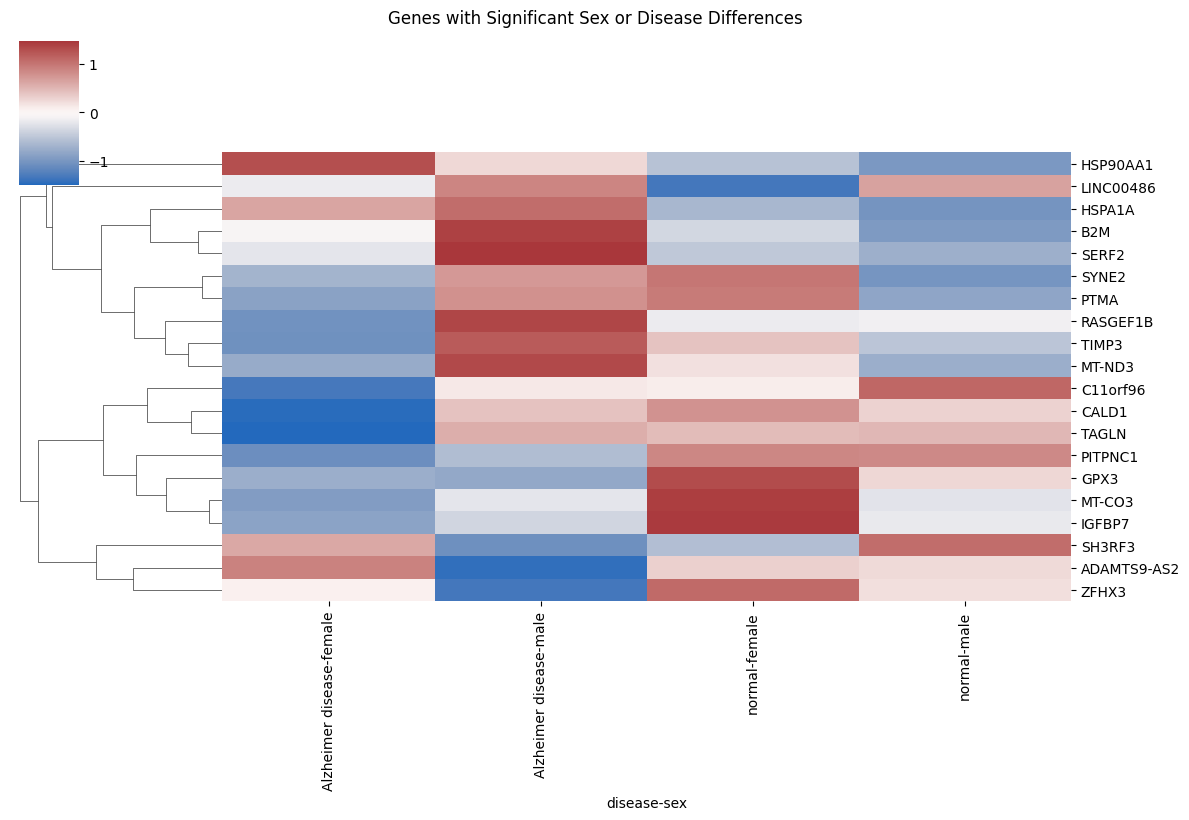

In [ ]:
# using absolute differences as a test for visualization

# manually z‐score each gene (row) so differences are in SD units
heat_df_z = heat_df.sub(heat_df.mean(axis=1), axis=0) \
                  .div(heat_df.std(axis=1), axis=0)

# compute absolute sex differences within each (cell_type, disease)
fem = heat_df_z.xs('female', axis=1, level='sex')
mal = heat_df_z.xs('male',   axis=1, level='sex')
sex_diff = (fem - mal).abs()

# compute absolute disease differences within each (cell_type, sex)
healthy  = heat_df_z.xs('normal',   axis=1, level='disease')
diseased = heat_df_z.xs('Alzheimer disease', axis=1, level='disease')
disease_diff = (healthy - diseased).abs()

# flag genes with any diff > threshold (e.g. 1 SD)
threshold = 1.0
mask = (sex_diff  > threshold).any(axis=1) | \
       (disease_diff > threshold).any(axis=1)
sig_genes = heat_df_z.index[mask]

# subset to those genes
heat_df_sig = heat_df_z.loc[sig_genes]

# Plot only the filtered clustermap
sns.clustermap(
    heat_df_sig,
    row_cluster=True,
    col_cluster=False,
    cmap='vlag',
    figsize=(12, len(sig_genes)*0.25 + 3),
    xticklabels=True,
    yticklabels=True
)
plt.suptitle("Genes with Significant Sex or Disease Differences", y=1.02)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import sparse

# 1) Collect top‐10 female, male, and overall genes from each cell type
genes_union = set()
for ct, sex_dict in results.items():
    # merge counts
    df_f = sex_dict['female'].rename(columns={'count':'female_count'})
    df_m = sex_dict['male'].rename(columns={'count':'male_count'})
    combined = (
        pd.merge(df_f, df_m,
                 left_index=True, right_index=True,
                 how='outer')
        .fillna(0)
        .astype(int)
    )
    combined['count_diff'] = combined['female_count'] - combined['male_count']
    combined['avg_count']  = (combined['female_count'] + combined['male_count'])/2

    # pick top-10 female‐biased, male‐biased, and overall
    top_f = combined.nlargest(5, 'count_diff').index
    bot_m = combined.nsmallest(5, 'count_diff').index
    top_o = combined.nlargest(5, 'avg_count').index

    genes_union.update(top_f)
    genes_union.update(bot_m)
    #genes_union.update(top_o)

genes_union = list(genes_union)

# 2) Extract expression matrix for these genes
mat = adata[:, genes_union].X
if sparse.issparse(mat):
    mat = mat.toarray()
expr_df = pd.DataFrame(mat,
                       index=adata.obs_names,
                       columns=genes_union)

# 3) Annotate with metadata and average per (cell_type, disease, sex)
meta = adata.obs[['cell_type','disease','sex']]
expr_df = expr_df.join(meta)
grouped = expr_df.groupby(['cell_type','disease','sex']).mean()

# 4) Build heatmap DataFrame: genes × groups
heat_df = grouped[genes_union].T
heat_df.columns = pd.MultiIndex.from_tuples(
    heat_df.columns,
    names=['cell_type','disease','sex']
)

# 5) Plot clustermap with rows (genes) clustered, columns in group order
sns.clustermap(
    heat_df,
    row_cluster=True,
    col_cluster=False,
    cmap='vlag',
    standard_scale=0,   # z-score each gene
    figsize=(12, len(genes_union)*0.25 + 3),
    xticklabels=True,
    yticklabels=True
)
plt.suptitle("Top Sex‐biased Genes Across Cell Types", y=1.02)
plt.show()


# Heatmap showing dataset differences
### This is way too much for a plot, but in the future when we have some candidate genes we care about i think it will be important to do this to show that the differences actually are the same across datasets and not just driven by one dataset

/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


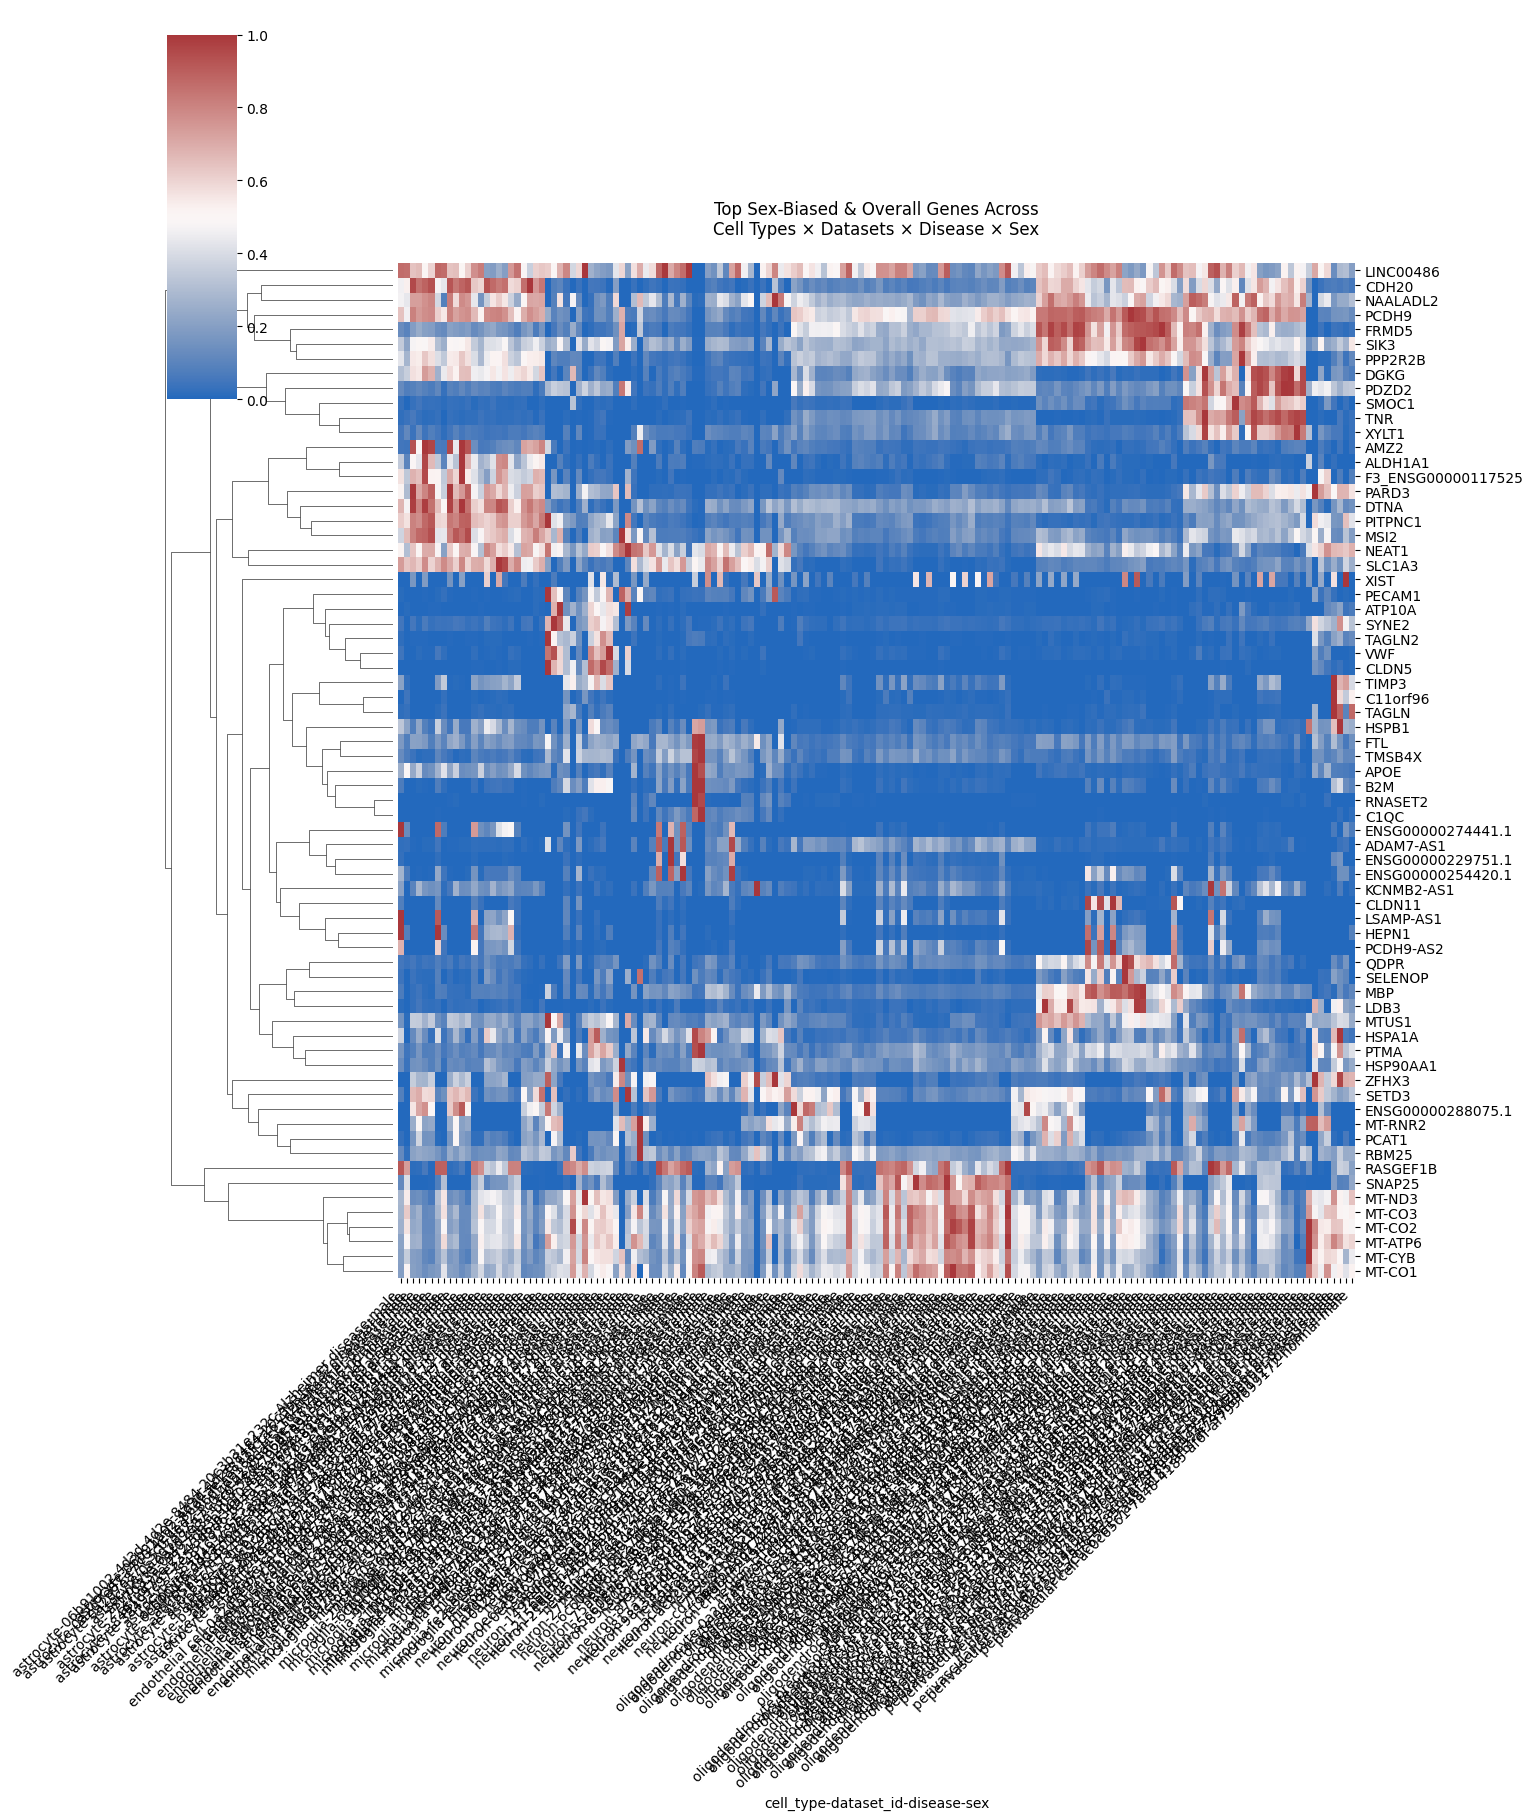

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import sparse

# 1) Collect top-10 female, male, and overall genes per cell type
genes_union = set()
for ct, sex_dict in results.items():
    df_f = sex_dict['female'].rename(columns={'count':'female_count'})
    df_m = sex_dict['male'].rename(columns={'count':'male_count'})
    combined = (
        pd.merge(df_f, df_m,
                 left_index=True, right_index=True,
                 how='outer')
        .fillna(0)
        .astype(int)
    )
    combined['count_diff'] = combined['female_count'] - combined['male_count']
    combined['avg_count']  = (combined['female_count'] + combined['male_count']) / 2

    genes_union.update(combined.nlargest(5, 'count_diff').index)
    genes_union.update(combined.nsmallest(5, 'count_diff').index)
    genes_union.update(combined.nlargest(5, 'avg_count').index)

genes_union = list(genes_union)

# 2) Pull normalized data
mat = adata[:, genes_union].X
if sparse.issparse(mat):
    mat = mat.toarray()
expr = pd.DataFrame(mat, index=adata.obs_names, columns=genes_union)

# 3) Annotate & group (observed=True to avoid missing‐category warnings)
meta = adata.obs[['cell_type','dataset_id','disease','sex']]
expr = expr.join(meta)
grouped = (
    expr
    .groupby(['cell_type','dataset_id','disease','sex'], observed=True)
    .mean()
)

# 4) Pivot to genes × group‐tuples
heat_df = grouped[genes_union].T
heat_df.columns = pd.MultiIndex.from_tuples(
    heat_df.columns,
    names=['cell_type','dataset_id','disease','sex']
)

# 5) Sort columns in a meaningful order
heat_df = heat_df.sort_index(
    axis=1, level=['cell_type','dataset_id','disease','sex']
)

# 6) Clean up missing/infinite values
heat_df = heat_df.replace([np.inf, -np.inf], np.nan).fillna(0)

# 7) Plot
cg = sns.clustermap(
    heat_df,
    row_cluster=True,      # cluster genes
    col_cluster=False,     # keep column ordering
    cmap='vlag',
    standard_scale=0,      # z-score each gene (row)
    figsize=(14, len(genes_union)*0.25 + 3),
    xticklabels=True,
    yticklabels=True
)
cg.ax_heatmap.set_title(
    "Top Sex-Biased & Overall Genes Across\nCell Types × Datasets × Disease × Sex",
    y=1.02
)
plt.setp(cg.ax_heatmap.get_xticklabels(), rotation=45, ha='right')
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


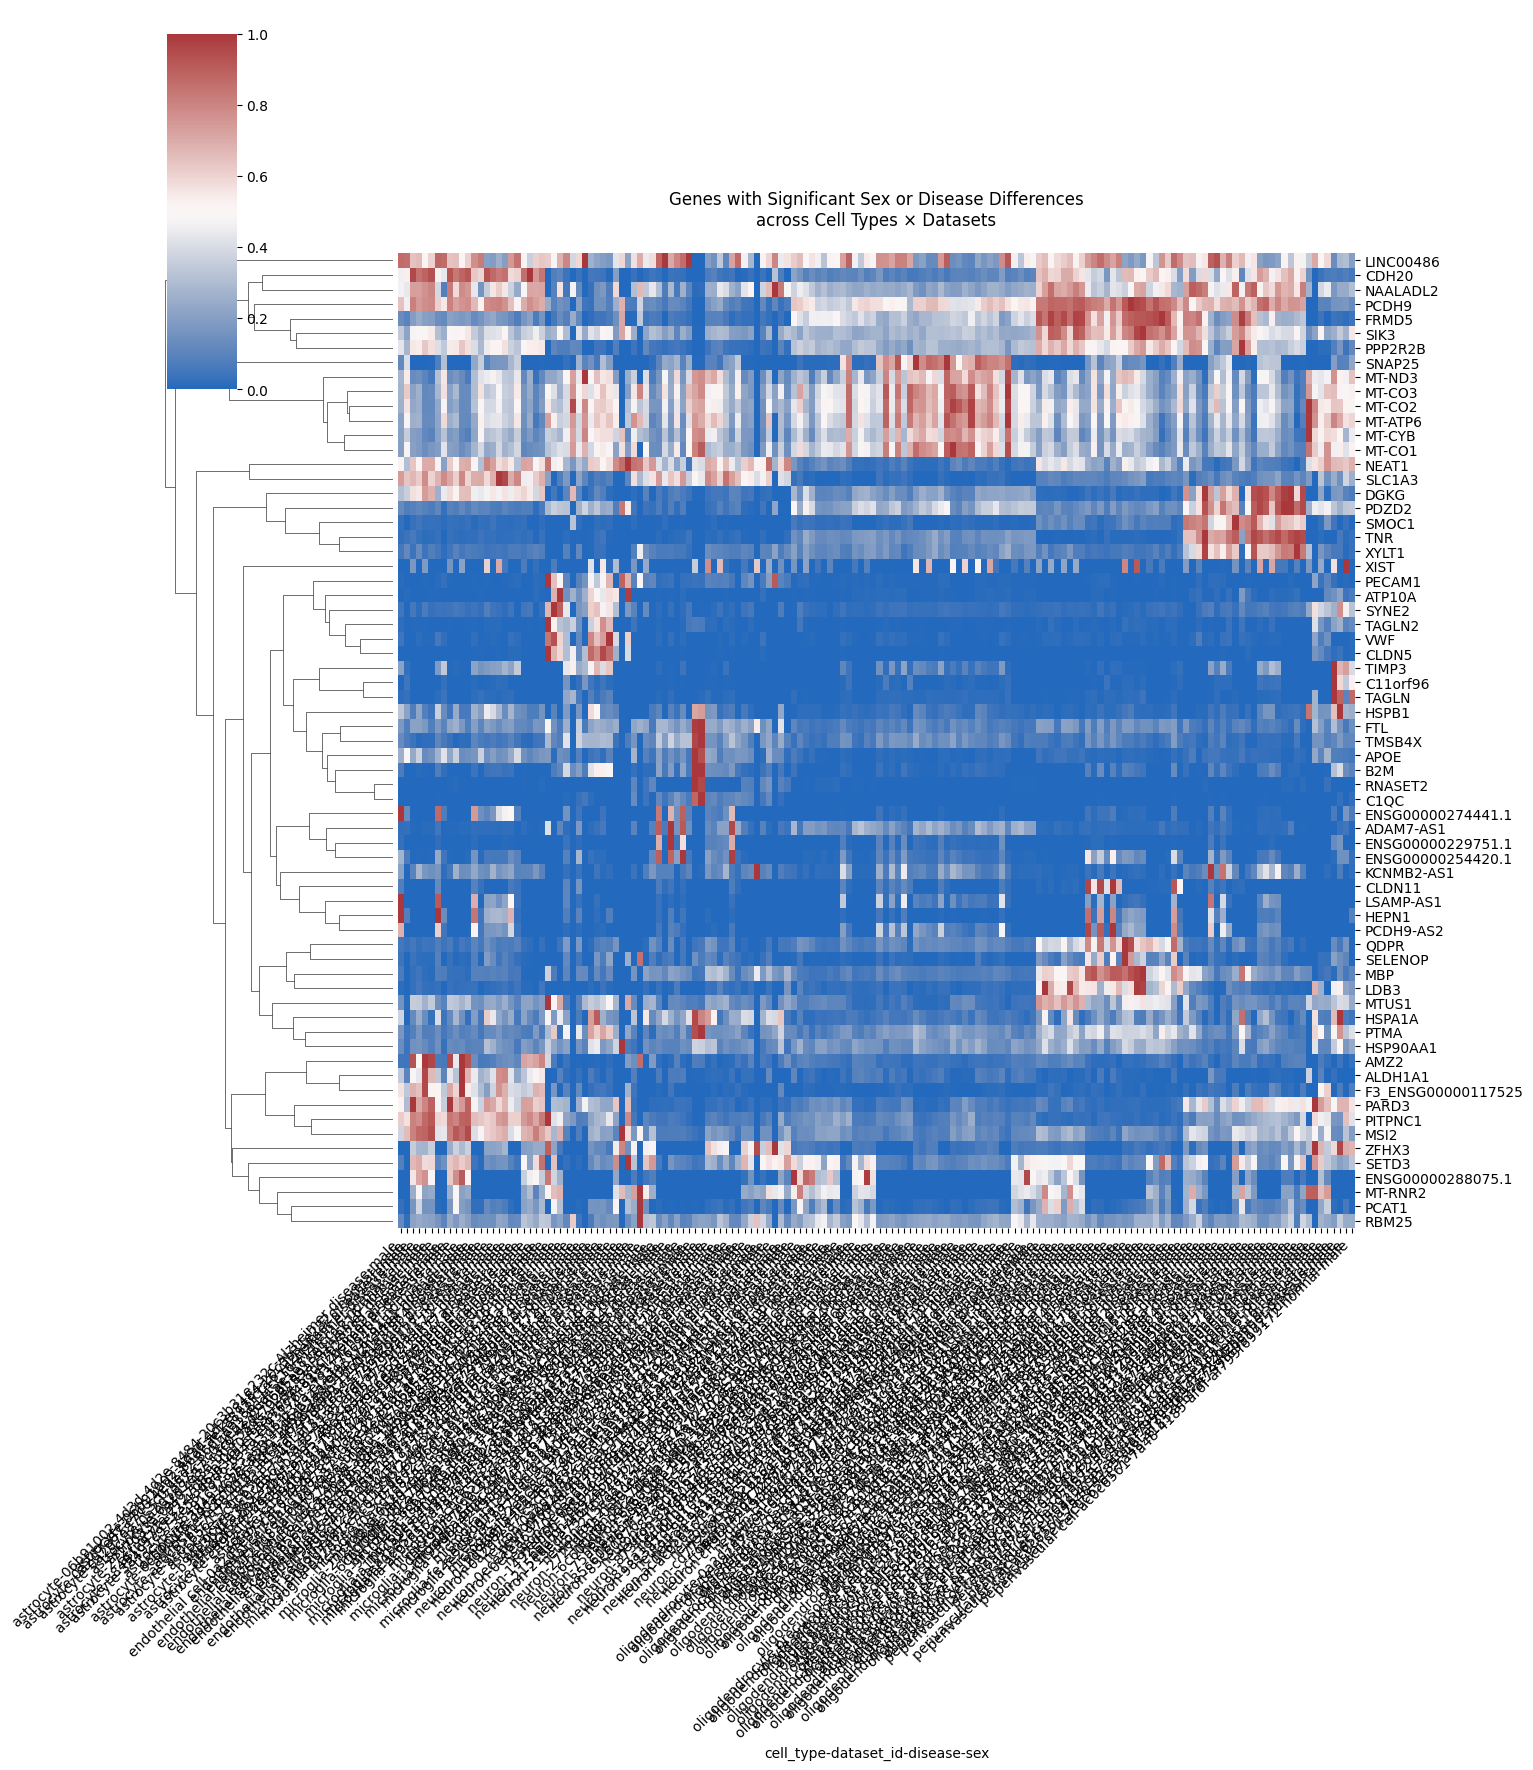

In [ ]:
# Filter to genes with ≥1 SD difference in sex or disease
# manually z-score each gene (row)
heat_df_z = heat_df.sub(heat_df.mean(axis=1), axis=0) \
                  .div(heat_df.std(axis=1), axis=0)

# compute |female–male| within each (cell_type, dataset_id, disease)
fem = heat_df_z.xs('female', axis=1, level='sex')
mal = heat_df_z.xs('male',   axis=1, level='sex')
sex_diff = (fem - mal).abs()

# compute |healthy–diseased| within each (cell_type, dataset_id, sex)
healthy  = heat_df_z.xs('normal',  axis=1, level='disease')
diseased = heat_df_z.xs('Alzheimer disease', axis=1, level='disease')
disease_diff = (healthy - diseased).abs()

# pick genes where ANY diff > threshold (e.g. 1 SD)
threshold = 1.0
mask = (sex_diff  > threshold).any(axis=1) | \
       (disease_diff > threshold).any(axis=1)
sig_genes = heat_df_z.index[mask]

# subset both the raw and z-scored tables
heat_df   = heat_df.loc[sig_genes]
genes_union = list(sig_genes)

# Re-plot on filtered set
cg = sns.clustermap(
    heat_df,
    row_cluster=True,
    col_cluster=False,
    cmap='vlag',
    standard_scale=0,
    figsize=(14, len(genes_union)*0.25 + 3),
    xticklabels=True,
    yticklabels=True
)
cg.ax_heatmap.set_title(
    "Genes with Significant Sex or Disease Differences\nacross Cell Types × Datasets",
    y=1.02
)
plt.setp(cg.ax_heatmap.get_xticklabels(), rotation=45, ha='right')
plt.show()

In [ ]:
# Using DE as well

# collect significant genes per cell type & contrast
sig_genes = set()
alpha = 0.05

for ct in adata.obs['cell_type'].unique():
    ad = adata[adata.obs['cell_type']==ct].copy()

    # — sex DE: female vs male
    sc.tl.rank_genes_groups(ad, 'sex', reference='male',    method='wilcoxon')
    df = sc.get.rank_genes_groups_df(ad, group='female')
    sig_genes |= set(df.loc[df['pvals_adj']<alpha, 'names'])

    sc.tl.rank_genes_groups(ad, 'sex', reference='female',  method='wilcoxon')
    df = sc.get.rank_genes_groups_df(ad, group='male')
    sig_genes |= set(df.loc[df['pvals_adj']<alpha, 'names'])

    # — disease DE: diseased vs normal
    sc.tl.rank_genes_groups(ad, 'disease', reference='normal',   method='wilcoxon')
    df = sc.get.rank_genes_groups_df(ad, group='Alzheimer disease')
    sig_genes |= set(df.loc[df['pvals_adj']<alpha, 'names'])

    sc.tl.rank_genes_groups(ad, 'disease', reference='Alzheimer disease', method='wilcoxon')
    df = sc.get.rank_genes_groups_df(ad, group='normal')
    sig_genes |= set(df.loc[df['pvals_adj']<alpha, 'names'])

sig_genes = list(sig_genes)

# subset heatmap to only those genes
heat_df_sub = heat_df.loc[heat_df.index.intersection(sig_genes)]

# drop any columns (cell_type×dataset×disease×sex) with no signal
heat_df_sub = heat_df_sub.loc[:, (heat_df_sub != 0).any(axis=0)]

# plot
cg = sns.clustermap(
    heat_df_sub,
    row_cluster=True,
    col_cluster=False,
    cmap='vlag',
    standard_scale=0,
    figsize=(14, len(heat_df_sub)*0.25 + 3),
    xticklabels=True,
    yticklabels=True
)
cg.ax_heatmap.set_title(
    f"{heat_df_sub.shape[0]} DE Genes Across Cell Types",
    y=1.02
)
plt.setp(cg.ax_heatmap.get_xticklabels(), rotation=45, ha='right')
plt.show()

NameError: name 'adata' is not defined

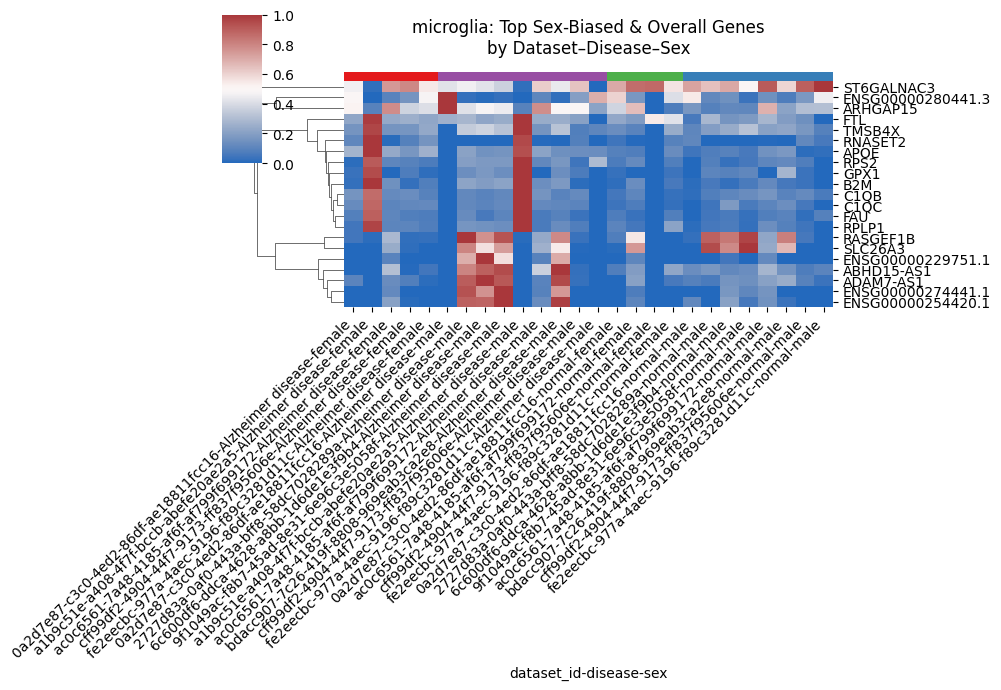

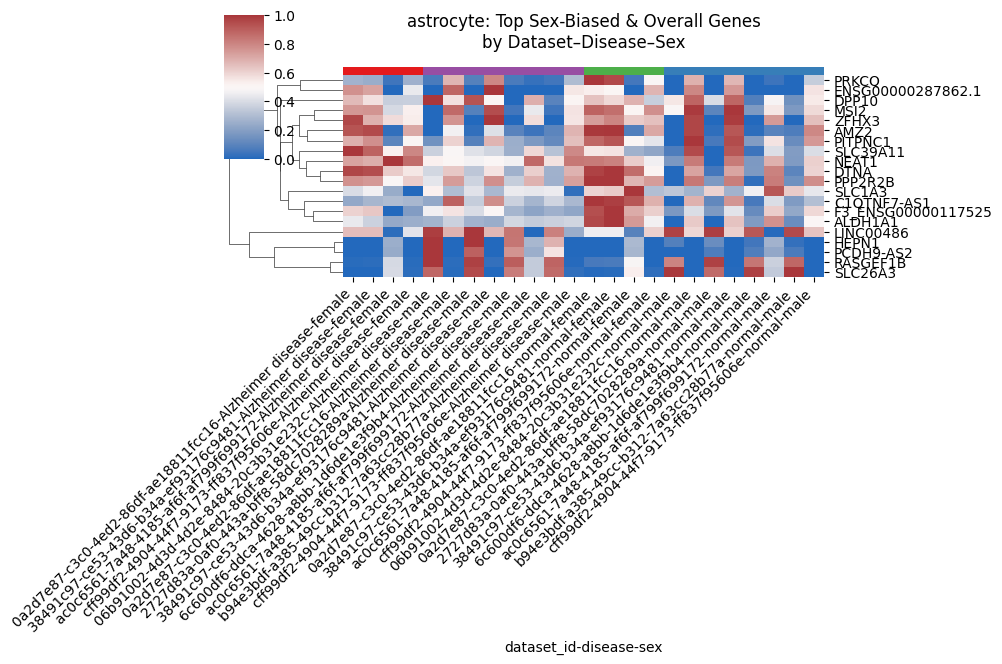

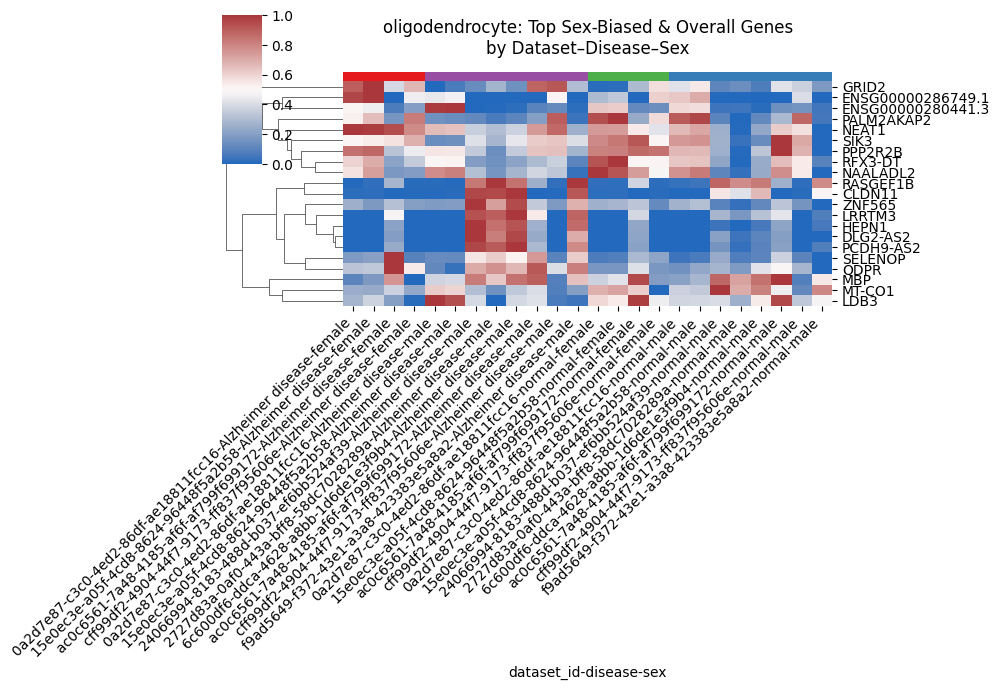

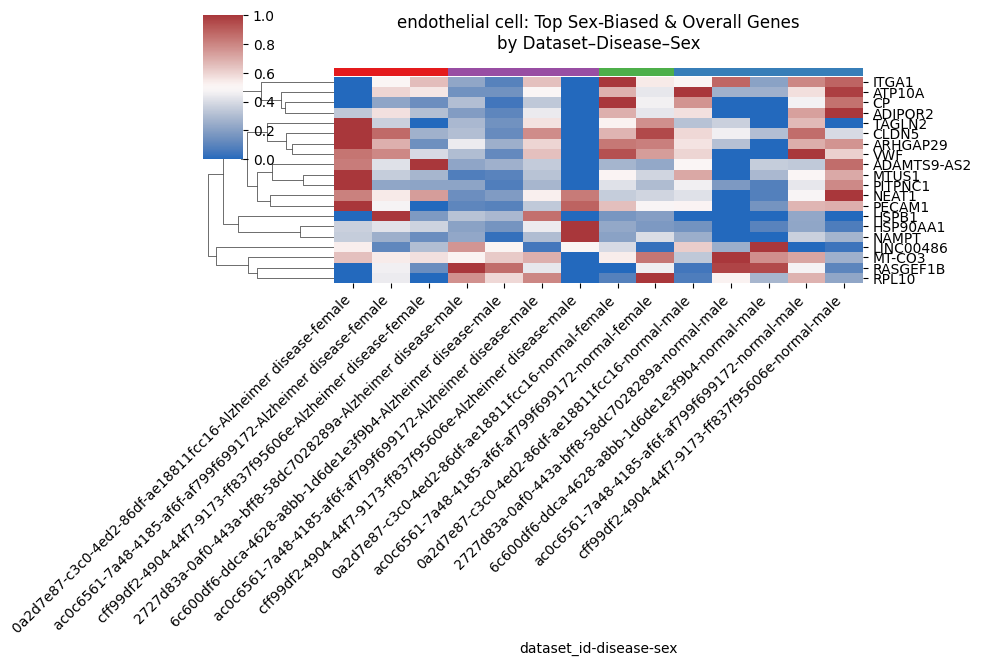

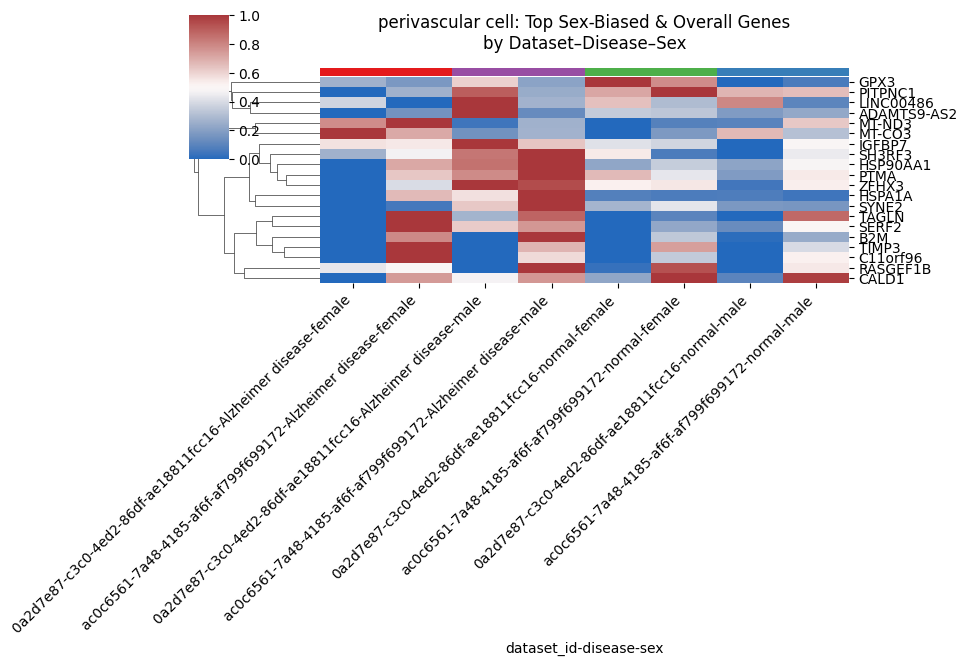

In [ ]:
# dataset specific heatmaps
palette = {
    "normal-female":            "#4DAF4A",
    "normal-male":              "#377EB8",
    "Alzheimer disease-female": "#E41A1C",
    "Alzheimer disease-male":   "#984EA3",
}

for ct, sex_dict in results.items():
    # pick union of top‐10 female/male/overall genes
    df_f = sex_dict['female'].rename(columns={'count':'female_count'})
    df_m = sex_dict['male'].  rename(columns={'count':'male_count'})
    comb = (
        pd.merge(df_f, df_m,
                 left_index=True, right_index=True, how='outer')
          .fillna(0).astype(int)
    )
    comb['diff'] = comb['female_count'] - comb['male_count']
    comb['avg']  = (comb['female_count'] + comb['male_count'])/2

    top_f = comb.nlargest(10, 'diff').index
    bot_m = comb.nsmallest(10, 'diff').index
    top_o = comb.nlargest(10, 'avg').index
    genes_ct = list({*top_f, *bot_m, *top_o})

    # extract & average per (dataset_id, disease, sex)
    mask = adata.obs['cell_type'] == ct
    mat = adata[mask, genes_ct].X
    if sparse.issparse(mat):
        mat = mat.toarray()
    df_mat = pd.DataFrame(mat,
                          index=adata.obs_names[mask],
                          columns=genes_ct)
    df_mat = df_mat.join(
        adata.obs.loc[mask, ['dataset_id','disease','sex']]
    )
    grouped = df_mat.groupby(
        ['dataset_id','disease','sex'], observed=True
    ).mean()
    heat_df = grouped[genes_ct].T
    heat_df.columns = pd.MultiIndex.from_tuples(
        heat_df.columns,
        names=['dataset_id','disease','sex']
    )

    # reorder columns so like‐colored groups stay together
    # sort by disease, then sex, then dataset_id
    new_cols = sorted(
        heat_df.columns,
        key=lambda t: (t[1], t[2], t[0])
    )
    heat_df = heat_df[new_cols]

    # rebuild the single‐row color stripe
    group_keys = [f"{d}-{s}" for (_ds, d, s) in heat_df.columns]
    col_colors = [palette[k] for k in group_keys]

    # plot with min–max row‐scaling
    cg = sns.clustermap(
        heat_df,
        row_cluster=True,
        col_cluster=False,
        cmap='vlag',
        standard_scale=0,
        figsize=(8, len(genes_ct)*0.25 + 3),
        xticklabels=True,
        yticklabels=True,
        col_colors=[col_colors]
    )
    cg.ax_heatmap.set_title(
        f"{ct}: Top Sex‐Biased & Overall Genes\nby Dataset–Disease–Sex",
        pad=20
    )
    cg.ax_heatmap.set_xticklabels(
        cg.ax_heatmap.get_xticklabels(),
        rotation=45, ha='right'
    )

    plt.show()


# Gene Set Enrichment Analysis

In [ ]:
! pip install gseapy

In [ ]:
import gseapy as gp
from matplotlib_venn import venn2
import seaborn as sns
import os
import time

# Function to perform enrichment analysis on gene sets
def perform_enrichment(gene_sets, output_dir='enrichment_results', max_retries=5, backoff=2):
    gene_sets_db = ['GO_Biological_Process_2025', 'KEGG_2021_Human']
    enrichment_results = {}

    for cell_type, sex_data in gene_sets.items():
        print(f"Processing cell type: {cell_type}")
        enrichment_results[cell_type] = {}

        for sex, df_genes in sex_data.items():
            if df_genes is None or df_genes.empty:
                print(f"  Skipping {sex} (no data)")
                enrichment_results[cell_type][sex] = None
                continue

            genes = list(df_genes.index)
            if len(genes) < 10:
                print(f"  Skipping {sex} (too few genes: {len(genes)})")
                enrichment_results[cell_type][sex] = None
                continue

            all_results = []
            for gene_db in gene_sets_db:
                attempt = 0
                while attempt < max_retries:
                    # deal with the fact that it kept erroring out and saying try again
                    try:
                        print(f"    [{sex}] Running ORA against {gene_db} (attempt {attempt+1})")
                        enr = gp.enrichr(
                            gene_list=genes,
                            gene_sets=gene_db,
                            organism='Human',
                            cutoff=0.05,
                            verbose=False
                        )
                        df = enr.results
                        if not df.empty:
                            df['Database'] = gene_db
                            all_results.append(df)
                        break   # success! exit retry loop
                    except Exception as e:
                        attempt += 1
                        print(f"      Error on {gene_db}: {e}. retrying in {backoff}s...")
                        time.sleep(backoff)
                else:
                    # we exhausted retries
                    print(f"      Failed {gene_db} after {max_retries} attempts, skipping.")

            if all_results:
                enrichment_results[cell_type][sex] = pd.concat(all_results, ignore_index=True)
            else:
                enrichment_results[cell_type][sex] = None
                print(f"  No successful enrichment for {sex} in {cell_type}")

    return enrichment_results


# Function to prepare gene sets from results
def prepare_gene_sets(results, min_count=20):
    """
    Prepare gene sets from RandomForest results

    Parameters:
    -----------
    results : dict
        The results dictionary
    min_count : int
        Minimum count to include a gene

    Returns:
    --------
    dict
        Dictionary with structure: {cell_type: {'female': df_female, 'male': df_male}}
    """
    gene_sets = {}

    for cell_type, sex_data in results.items():
        gene_sets[cell_type] = {}

        # Get female and male data
        female_data = sex_data.get('female')
        male_data = sex_data.get('male')

        # Store DataFrames with genes that pass the minimum count threshold
        if female_data is not None:
            gene_sets[cell_type]['female'] = female_data[female_data['count'] >= min_count]
        else:
            gene_sets[cell_type]['female'] = None

        if male_data is not None:
            gene_sets[cell_type]['male'] = male_data[male_data['count'] >= min_count]
        else:
            gene_sets[cell_type]['male'] = None

    return gene_sets

# Function to visualize top enriched terms
def visualize_enrichment(enrichment_results, output_dir='enrichment_plots'):
    """
    Create visualizations for enrichment results

    Parameters:
    -----------
    enrichment_results : dict
        Dictionary containing enrichment results
    output_dir : str
        Directory to save visualization plots
    """
    os.makedirs(output_dir, exist_ok=True)

    for cell_type, sex_data in enrichment_results.items():
        print(f"Creating visualizations for {cell_type}")


        female_results = sex_data.get('female')
        male_results = sex_data.get('male')

        # Create comparison plots if both sexes have results
        if female_results is not None and male_results is not None:
            # Get top terms for each sex (by adjusted p-value)
            female_top = female_results.sort_values('Adjusted P-value').head(15)
            male_top = male_results.sort_values('Adjusted P-value').head(15)

            # Create bar plots for top terms
            plt.figure(figsize=(12, 8))

            # Female plot
            plt.subplot(1, 2, 1)
            sns.barplot(x='-log10(Adjusted P-value)', y='Term', data=female_top.assign(**{
                '-log10(Adjusted P-value)': -np.log10(female_top['Adjusted P-value'])
            }).sort_values('-log10(Adjusted P-value)'), color='orange')
            plt.title(f'Top Female Enrichment - {cell_type}')
            plt.show()
            plt.tight_layout()

            # Male plot
            plt.subplot(1, 2, 2)
            sns.barplot(x='-log10(Adjusted P-value)', y='Term', data=male_top.assign(**{
                '-log10(Adjusted P-value)': -np.log10(male_top['Adjusted P-value'])
            }).sort_values('-log10(Adjusted P-value)'), color='purple')
            plt.title(f'Top Male Enrichment - {cell_type}')
            plt.tight_layout()
            plt.show()
            plt.close()

            # Create Venn diagram of overlapping terms
            female_terms = set(female_results['Term'])
            male_terms = set(male_results['Term'])

            plt.figure(figsize=(8, 8))
            venn2([female_terms, male_terms], ('Female', 'Male'))
            plt.title(f'Overlapping Enriched Terms - {cell_type}')
            plt.show()
            plt.close()

            # Create heatmap of shared pathways
            shared_terms = list(female_terms.intersection(male_terms))
            if shared_terms:
                # Get data for shared terms
                shared_female = female_results[female_results['Term'].isin(shared_terms)]
                shared_male = male_results[male_results['Term'].isin(shared_terms)]

                # Merge data
                merged = pd.merge(
                    shared_female[['Term', 'Adjusted P-value']].rename(columns={'Adjusted P-value': 'Female_padj'}),
                    shared_male[['Term', 'Adjusted P-value']].rename(columns={'Adjusted P-value': 'Male_padj'}),
                    on='Term'
                )

                # Create log-transformed values for better visualization
                merged['Female_log10padj'] = -np.log10(merged['Female_padj'])
                merged['Male_log10padj'] = -np.log10(merged['Male_padj'])

                # Sort by difference in significance
                merged['diff'] = np.abs(merged['Female_log10padj'] - merged['Male_log10padj'])
                merged = merged.sort_values('diff', ascending=False).head(20)

                # Create heatmap data
                heatmap_data = merged.set_index('Term')[['Female_log10padj', 'Male_log10padj']]

                # Plot heatmap
                plt.figure(figsize=(10, 12))
                sns.heatmap(heatmap_data, cmap='viridis', annot=True)
                plt.title(f'Sex-Specific Significance of Shared Pathways - {cell_type}')
                plt.tight_layout()
                plt.show()
                plt.close()



# main
def main():
    # Prepare gene sets from results
    gene_sets = prepare_gene_sets(results, min_count=20)

    print("Performing enrichment analysis with gseapy...")
    enrichment_results = perform_enrichment(gene_sets)
    visualize_enrichment(enrichment_results)

    # Return results for further analysis
    return {
        'gene_sets': gene_sets,
        'enrichment_results': enrichment_results
    }

if __name__ == "__main__":
    analysis_results = main()